<a href="https://colab.research.google.com/github/timothyjgraham/AlgorithmicBiasX/blob/main/Code_for_report_A_computational_analysis_of_potential_algorithmic_bias_on_platform_X_during_the_2024_US_election.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase One: Analysis of Potential Algorithmic Boost to Elon Musk’s Engagement Metrics on Platform X

In [1]:
# NOTE! Make sure you set the correct file path for your NDJSON data file, containing the posts.

# YOUR_FILE_PATH = "INSERT_FILE_PATH_HERE"

In [2]:
# import json
!pip install ndjson
import ndjson
import pandas as pd
from tqdm import tqdm
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Function to parse a single item from the NDJSON
def parse_tweet_data(item):
    parsed_item = {}

    # Tweet and user metadata
    parsed_item['tweet_id'] = item.get('item_id', None)

    # Get tweet details
    data = item.get('data', {})
    legacy = data.get('legacy', {})

    # Full text of the tweet
    parsed_item['full_text'] = legacy.get('full_text', None)

    # View count
    views = data.get('views', {})
    parsed_item['view_count'] = views.get('count', None)

    # Retweet, like, and reply counts
    parsed_item['retweet_count'] = legacy.get('retweet_count', None)
    parsed_item['favorite_count'] = legacy.get('favorite_count', None)
    parsed_item['reply_count'] = legacy.get('reply_count', None)

    # Creation date
    parsed_item['created_at'] = legacy.get('created_at', None)

    # User information
    user = data.get('core', {}).get('user_results', {}).get('result', {}).get('legacy', {})
    parsed_item['username'] = user.get('screen_name', None)
    parsed_item['author_name'] = user.get('name', None)
    parsed_item['author_followers'] = user.get('followers_count', None)

    return parsed_item

# Function to process the NDJSON file and extract relevant data
def process_ndjson(file_path, chunk_size=1000):
    tweet_data = []

    with open(file_path, 'r') as f:
        # Read the NDJSON file using ndjson library
        ndjson_reader = ndjson.reader(f)

        # Process each row with a progress bar
        for item in tqdm(ndjson_reader, desc="Processing Tweets"):
            parsed_item = parse_tweet_data(item)
            tweet_data.append(parsed_item)

    # Convert list of dictionaries to a DataFrame
    df = pd.DataFrame(tweet_data)

    return df

# Path to your NDJSON file in Google Drive or locally.
file_path = YOUR_FILE_PATH

# Process the NDJSON and get the DataFrame
df = process_ndjson(file_path)

# Optional code to produce a CSV version of the dataset if you want it.

# Display the first few rows of the DataFrame to verify
# print(df.head())

# Path to save the output CSV in Google Drive or locally.
# output_csv = '/content/drive/My Drive/X_Algorithm_study/tweet_data_output.csv' # Google Drive
# output_csv = 'tweet_data_output.csv' # Or locally

# Save the DataFrame to CSV
# df.to_csv(output_csv, index=False)

# print(f"Data saved to {output_csv}")


Mounted at /content/drive


Processing Tweets: 62604it [00:16, 3719.30it/s]


In [3]:
df

,tweet_id,full_text,view_count,retweet_count,favorite_count,reply_count,created_at,username,author_name,author_followers
0,1848622653881356772,RT @elon_docs: Elon Musk: Let's explore the ga...,216,1077,0,0,Tue Oct 22 07:09:21 +0000 2024,elonmusk,Elon Musk,202185294
1,1848619558321459328,What reason was given for repealing this law?,19585142,7171,31495,8151,Tue Oct 22 06:57:03 +0000 2024,elonmusk,Elon Musk,202185294
2,1848617981896466783,The “XOXOXO” part is fake,23836744,12490,88422,3044,Tue Oct 22 06:50:47 +0000 2024,elonmusk,Elon Musk,202185294
3,1848609164844536210,Finished faster after masterworking my rod 3 t...,22904634,3225,37578,476,Tue Oct 22 06:15:45 +0000 2024,elonmusk,Elon Musk,202185294
4,1848595028509168042,RT @america: Kamala Harris cackles as she sugg...,242,2377,0,0,Tue Oct 22 05:19:34 +0000 2024,elonmusk,Elon Musk,202185294
...,...,...,...,...,...,...,...,...,...,...
62599,1849322667272179789,RT @ShaykhSulaiman: This 14 year old was a vio...,None,3406,0,0,Thu Oct 24 05:30:57 +0000 2024,kateneuropsych,kateneuropsych Dr. Kate Shaw MA/MS/PsyD Auntie Fa,5865
62600,1849322660473569675,RT @mileswgriffis: The CDC's own data also ide...,None,11,0,0,Thu Oct 24 05:30:55 +0000 2024,babs_zone,itsbabs.bsky.social ✨,5279
62601,1849322640856465848,RT @Trickstersworld: “How have we reached a po...,None,10377,0,0,Thu Oct 24 05:30:50 +0000 2024,kateneuropsych,kateneuropsych Dr. Kate Shaw MA/MS/PsyD Auntie Fa,5865
62602,1849322852962492616,RT @sumlenny: If the @UN would have existed in...,None,3073,0,0,Thu Oct 24 05:31:41 +0000 2024,JayinKyiv,Jay in Kyiv,124120


In [17]:
# Filter out rows where the 'view_count' is None or NaN
filtered_df = df[df['view_count'].notna()]

# Display the filtered dataframe to verify
filtered_df

# We clean the dataset in the next step to remove posts not authored by the target set of accounts

,tweet_id,full_text,view_count,retweet_count,favorite_count,reply_count,created_at,username,author_name,author_followers
0,1848622653881356772,RT @elon_docs: Elon Musk: Let's explore the ga...,216,1077,0,0,Tue Oct 22 07:09:21 +0000 2024,elonmusk,Elon Musk,202185294
1,1848619558321459328,What reason was given for repealing this law?,19585142,7171,31495,8151,Tue Oct 22 06:57:03 +0000 2024,elonmusk,Elon Musk,202185294
2,1848617981896466783,The “XOXOXO” part is fake,23836744,12490,88422,3044,Tue Oct 22 06:50:47 +0000 2024,elonmusk,Elon Musk,202185294
3,1848609164844536210,Finished faster after masterworking my rod 3 t...,22904634,3225,37578,476,Tue Oct 22 06:15:45 +0000 2024,elonmusk,Elon Musk,202185294
4,1848595028509168042,RT @america: Kamala Harris cackles as she sugg...,242,2377,0,0,Tue Oct 22 05:19:34 +0000 2024,elonmusk,Elon Musk,202185294
...,...,...,...,...,...,...,...,...,...,...
62589,1849323325853401527,"Lucy Davies, contemporary UK painter known for...",868,7,46,0,Thu Oct 24 05:33:34 +0000 2024,womensart1,#WOMENSART,476679
62593,1849323110375227441,"Now, this is the kind of review of a franchise...",45,0,1,0,Thu Oct 24 05:32:42 +0000 2024,KEBrightbill,Kathryn Brightbill 🖋️,10698
62594,1849322931634991298,What’s your theory on Grey aliens? Are they ex...,729,2,9,2,Thu Oct 24 05:32:00 +0000 2024,konstructivizm,Black Hole,615283
62597,1849322831714169213,Attack 0%\nDamage 100% https://t.co/HMAkWPdQKf,10455,12,86,79,Thu Oct 24 05:31:36 +0000 2024,HumansNoContext,NO CONTEXT HUMANS,5555307


In [18]:
# import pandas as pd

# # Standardize the usernames to Twitter's correct capitalization
# username_mapping = {
#     'jackposobiec': 'JackPosobiec',
#     'elonmusk': 'elonmusk',
#     'libsoftiktok': 'libsoftiktok',
#     'donaldjtrumpjr': 'DonaldJTrumpJr',
#     'kamalaharris': 'KamalaHarris',
#     'aoc': 'AOC',
#     'berniesanders': 'BernieSanders',
#     'tuckercarlson': 'TuckerCarlson',
#     'corybooker': 'CoryBooker',
#     'staceyabrams': 'staceyabrams'
# }

# # Apply the mapping to the filtered DataFrame
# filtered_df['username'] = filtered_df['username'].str.lower().map(username_mapping)

# # Convert 'created_at' to timezone-naive datetime and filter dates
# filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'], errors='coerce').dt.tz_localize(None)
# filtered_df = filtered_df[filtered_df['created_at'] >= pd.to_datetime('2024-01-01')]

# # Calculate total posts for each account in the filtered dataset
# total_posts_per_account = filtered_df['username'].value_counts()

# # Create a DataFrame for clear presentation
# total_posts_df = pd.DataFrame({
#     'Account': total_posts_per_account.index,
#     'Total Posts': total_posts_per_account.values
# })

# # Display the table of total posts per account
# print(total_posts_df)

# Standardize the usernames to Twitter's correct capitalization
username_mapping = {
    'jackposobiec': 'JackPosobiec',
    'elonmusk': 'elonmusk',
    'libsoftiktok': 'libsoftiktok',
    'donaldjtrumpjr': 'DonaldJTrumpJr',
    'kamalaharris': 'KamalaHarris',
    'aoc': 'AOC',
    'berniesanders': 'BernieSanders',
    'tuckercarlson': 'TuckerCarlson',
    'corybooker': 'CoryBooker',
    'staceyabrams': 'staceyabrams'
}

# Apply the mapping to standardize usernames
filtered_df['username'] = filtered_df['username'].str.lower().map(username_mapping)

# Remove any rows with usernames not in the username_mapping dictionary
filtered_df = filtered_df[filtered_df['username'].notna()]

# Convert 'created_at' to timezone-naive datetime and filter dates
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'], errors='coerce').dt.tz_localize(None)
filtered_df = filtered_df[filtered_df['created_at'] >= pd.to_datetime('2024-01-01')]

# Calculate total posts for each account in the filtered dataset
total_posts_per_account = filtered_df['username'].value_counts()

# Create a DataFrame for clear presentation
total_posts_df = pd.DataFrame({
    'Account': total_posts_per_account.index,
    'Total Posts': total_posts_per_account.values
})

# Display the table of total posts per account
print(total_posts_df)



<ipython-input-18-e26b94562ad7>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['username'] = filtered_df['username'].str.lower().map(username_mapping)
<ipython-input-18-e26b94562ad7>:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'], errors='coerce').dt.tz_localize(None)


          Account  Total Posts
0    JackPosobiec        25146
1        elonmusk        17594
2    libsoftiktok         8699
3  DonaldJTrumpJr         1572
4    KamalaHarris         1515
5             AOC          497
6   BernieSanders          438
7   TuckerCarlson          283
8      CoryBooker          244
9    staceyabrams          196


<ipython-input-18-e26b94562ad7>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'], errors='coerce').dt.tz_localize(None)


Plot the post counts over time for accounts in the dataset.

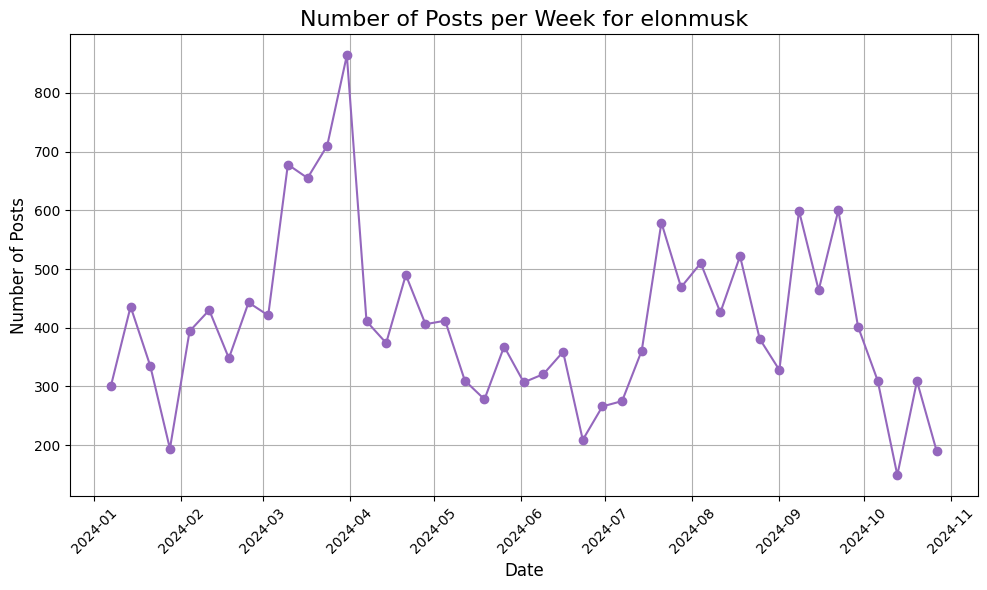

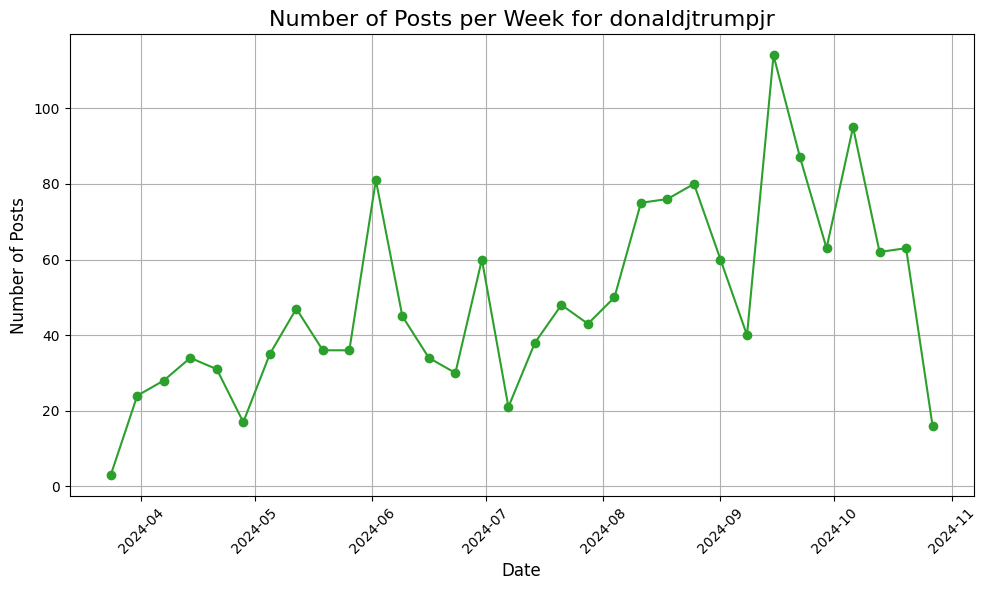

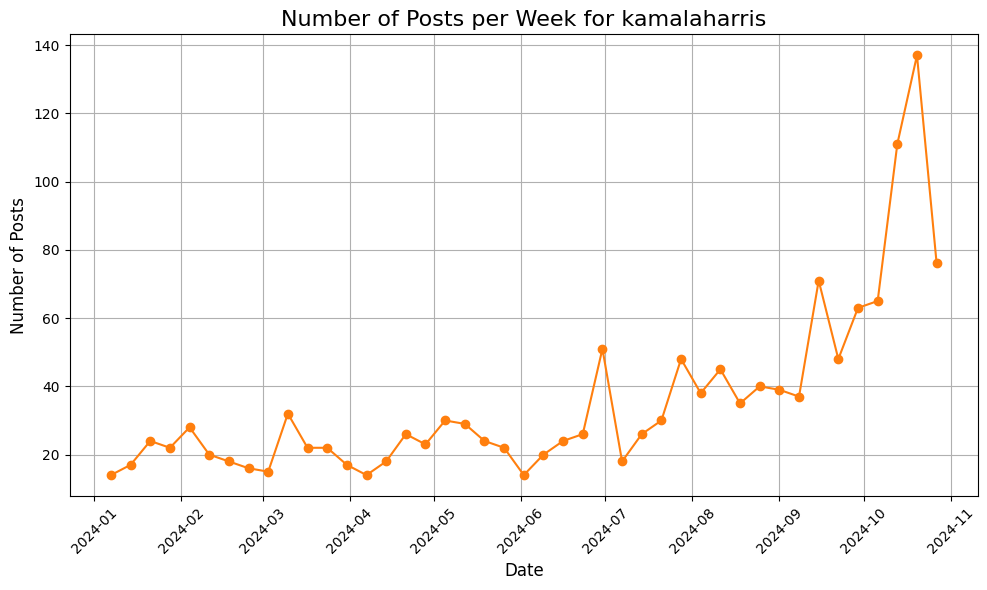

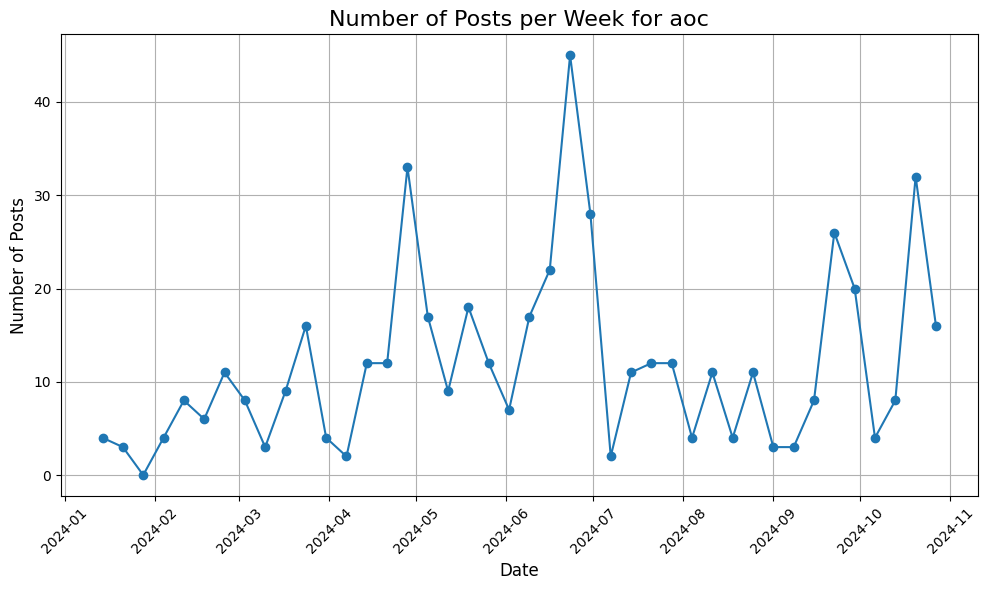

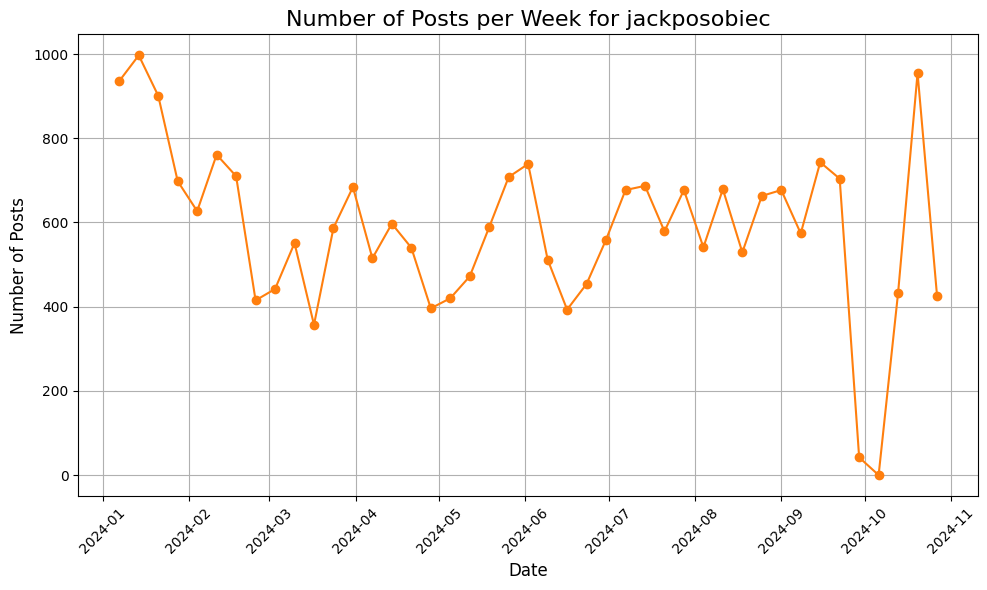

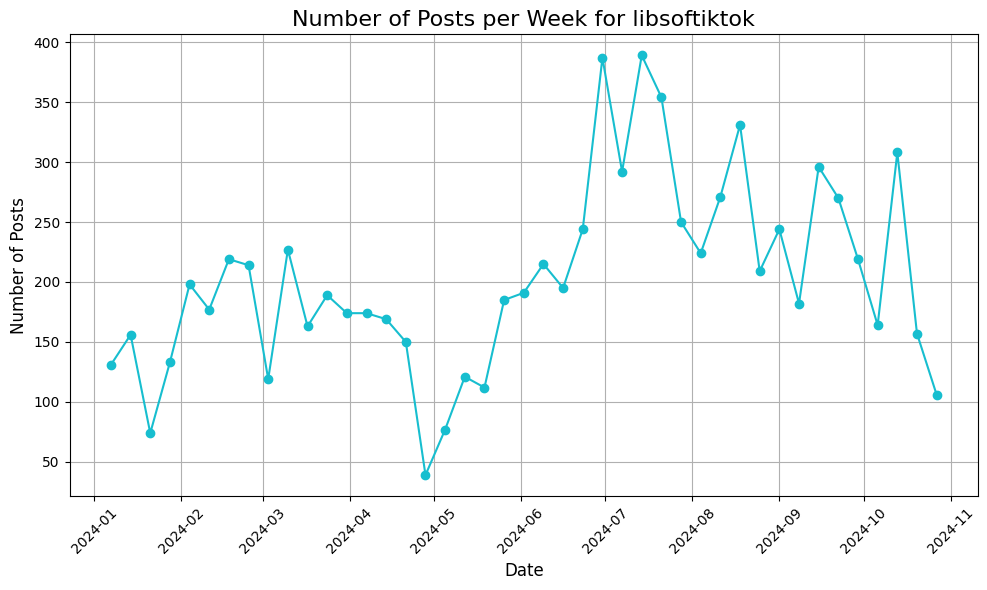

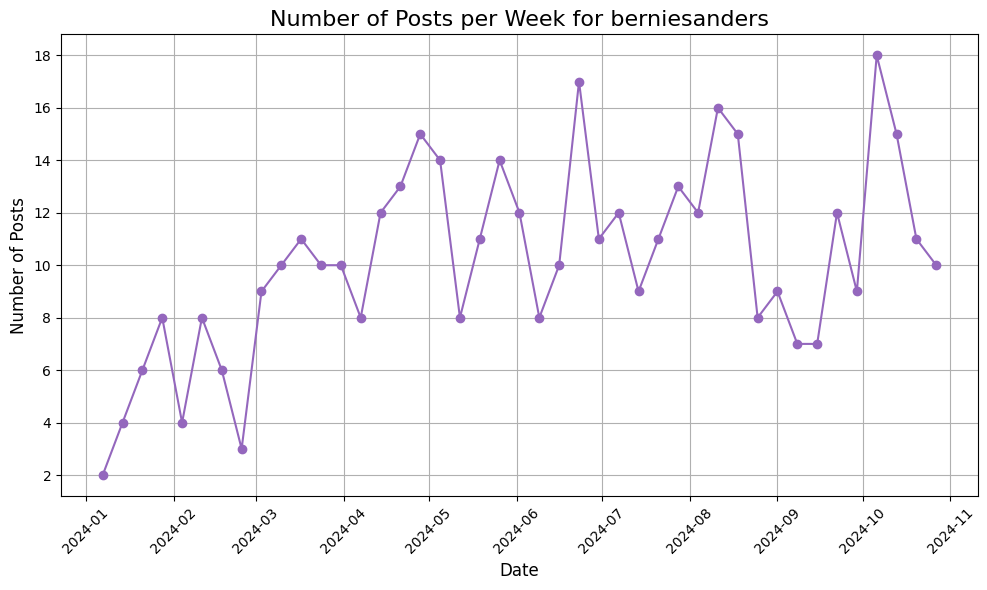

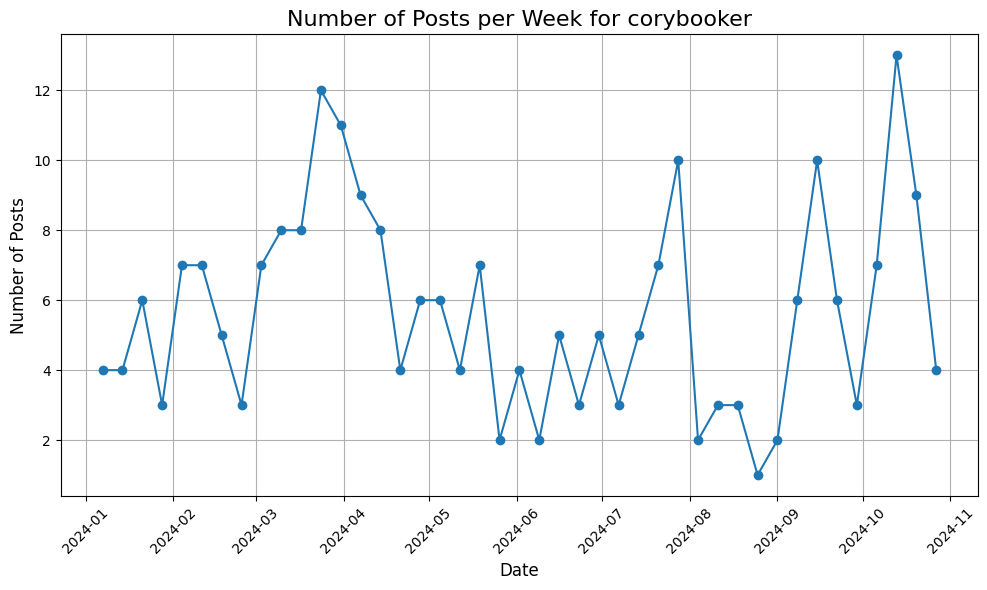

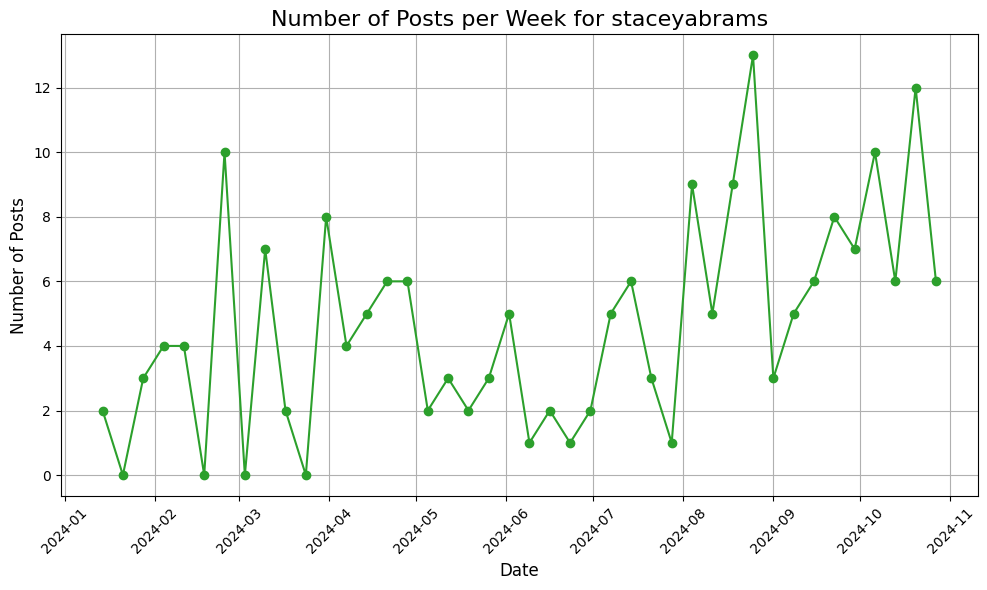

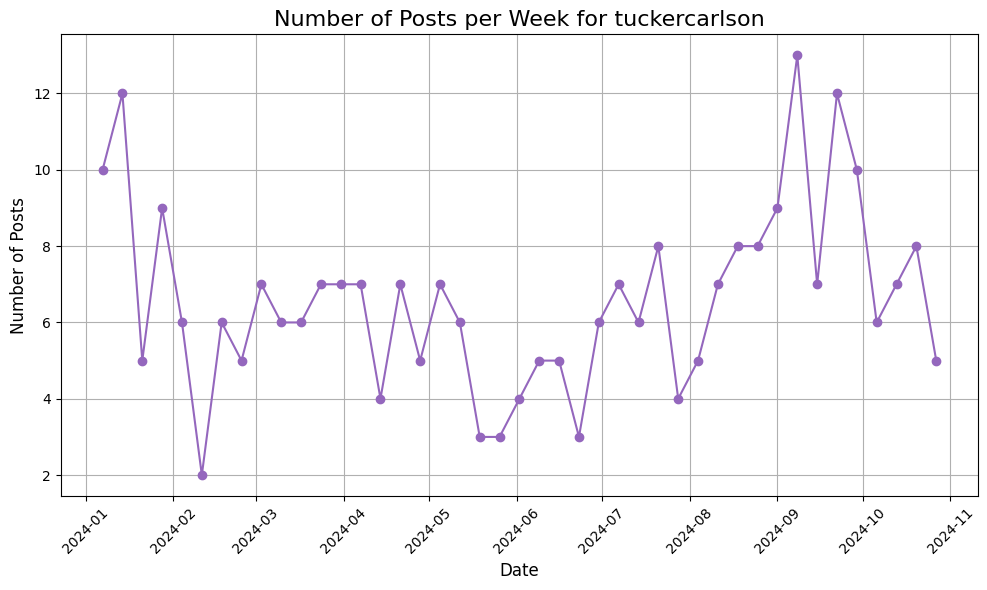

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# We assume filtered_df is already filtered by usernames and creation date.

# Loop through each unique username in the filtered_df and plot the number of posts per week
for username in filtered_df['username'].str.lower().unique():
    # Filter data for the current username
    user_data = filtered_df[filtered_df['username'].str.lower() == username]

    # Resample to count the number of posts per week, ensuring missing weeks are filled with 0
    if not user_data.empty:
        user_data = user_data.set_index('created_at')  # Set 'created_at' as the index
        weekly_posts = user_data.resample('W').size()  # Resample by week and count posts
        weekly_posts = weekly_posts.reindex(pd.date_range(start=weekly_posts.index.min(),
                                                          end=weekly_posts.index.max(), freq='W'), fill_value=0)

        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(weekly_posts.index, weekly_posts.values, marker='o', linestyle='-',
                 label=username, color=plt.cm.tab10(hash(username) % 10))  # Use a color for each account

        # Adding title and labels
        plt.title(f'Number of Posts per Week for {username}', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Number of Posts', fontsize=12)

        # Add grid and format x-axis dates
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Show the plot
        plt.show()
    else:
        print(f"No data available for {username}")


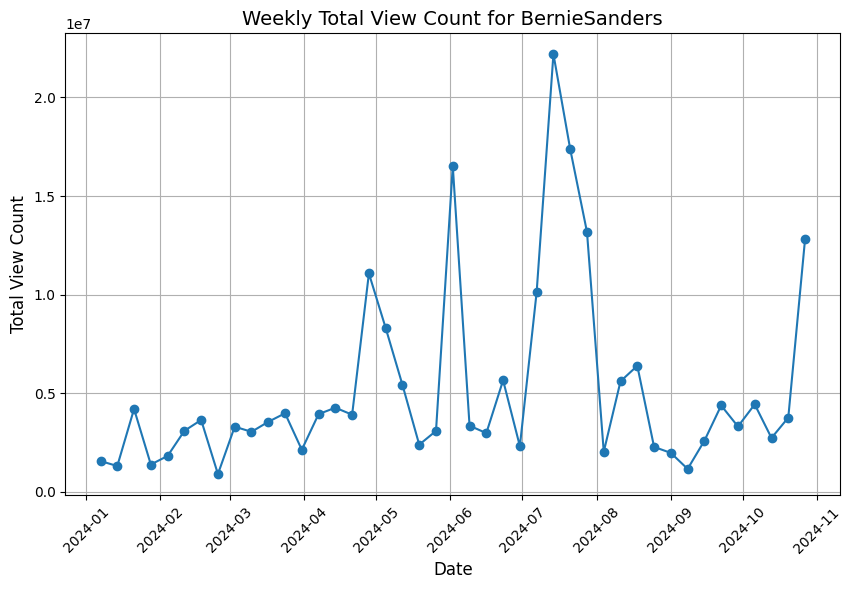

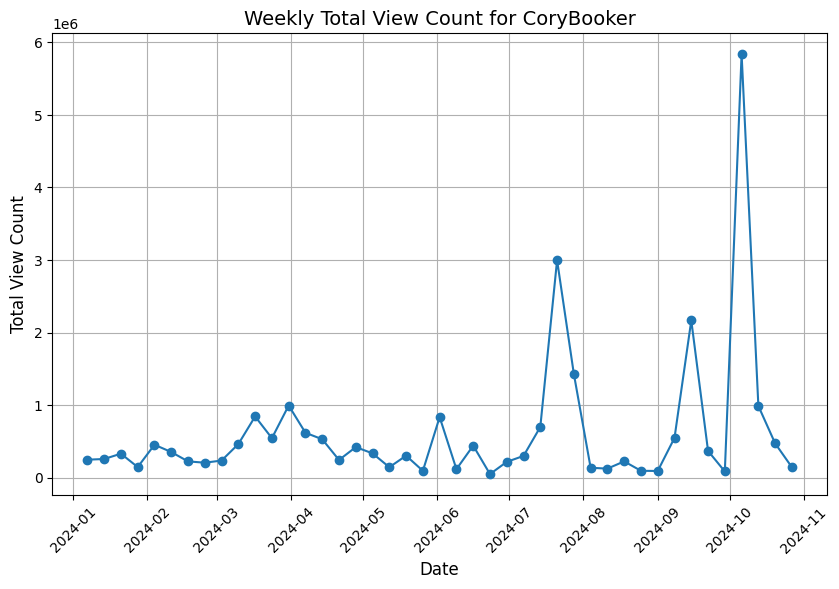

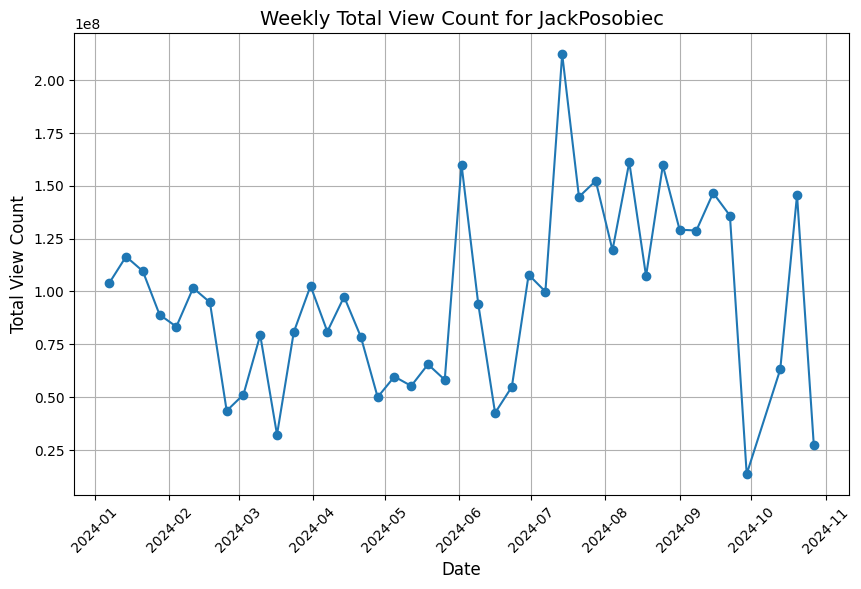

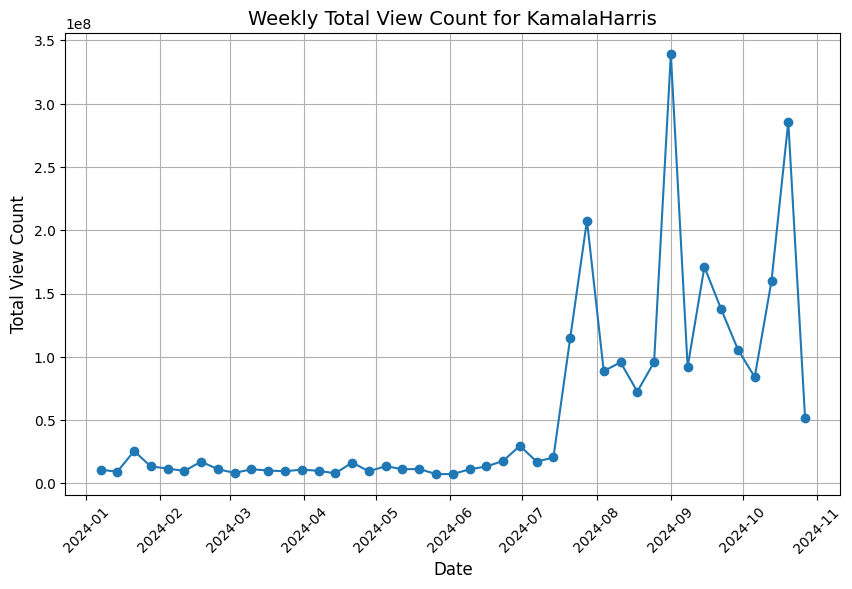

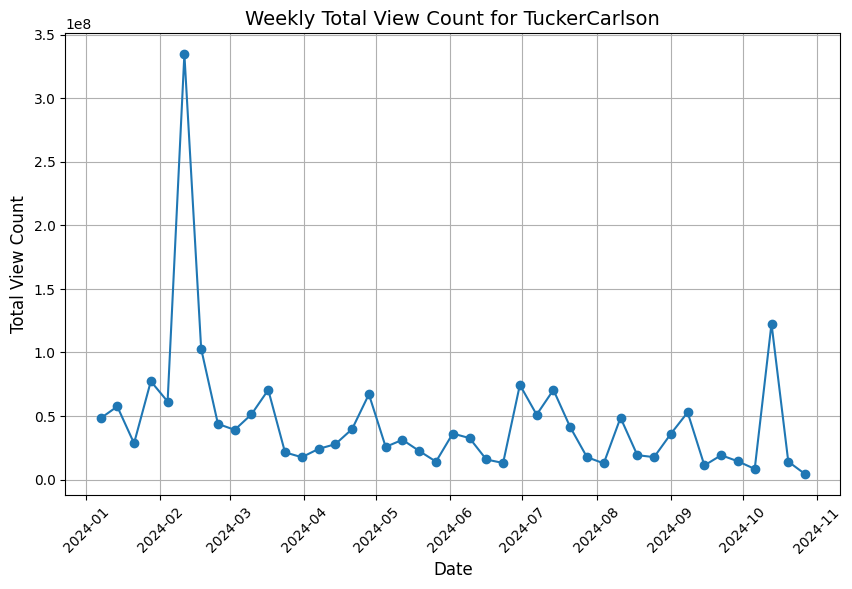

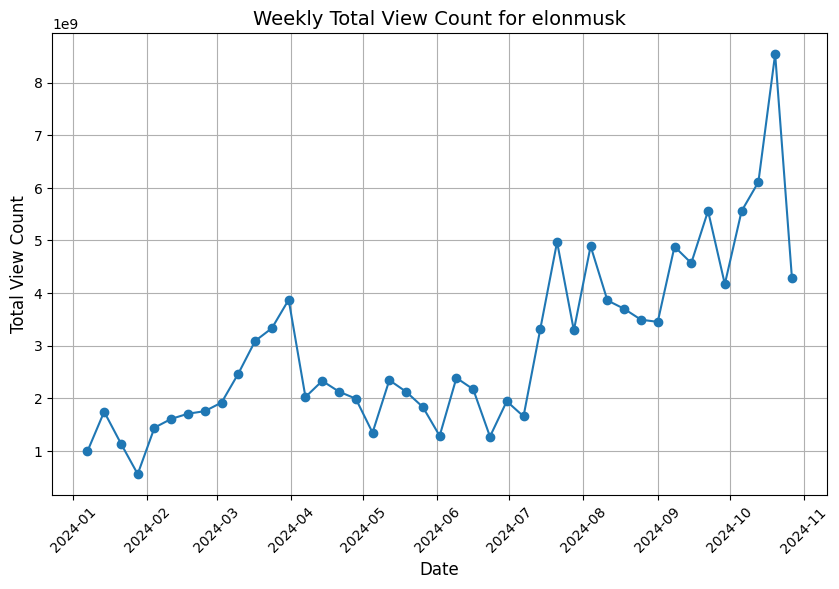

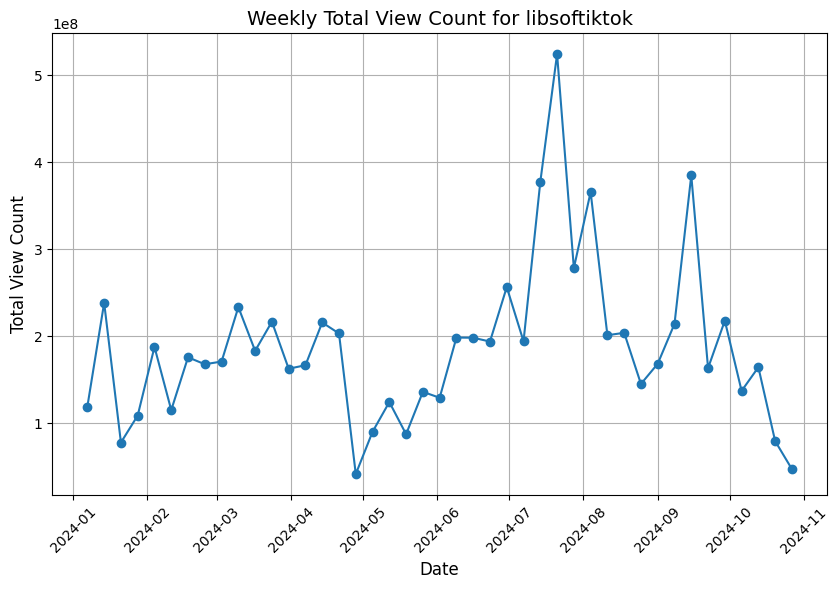

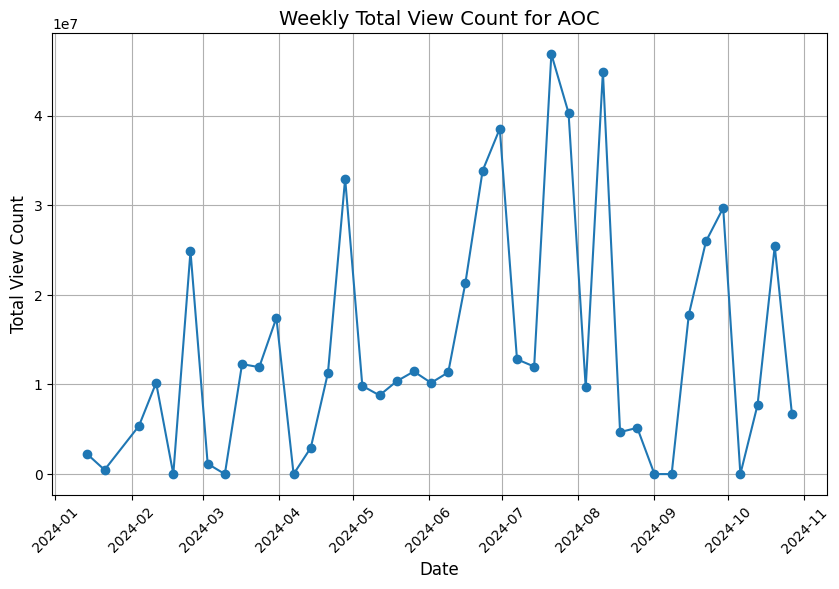

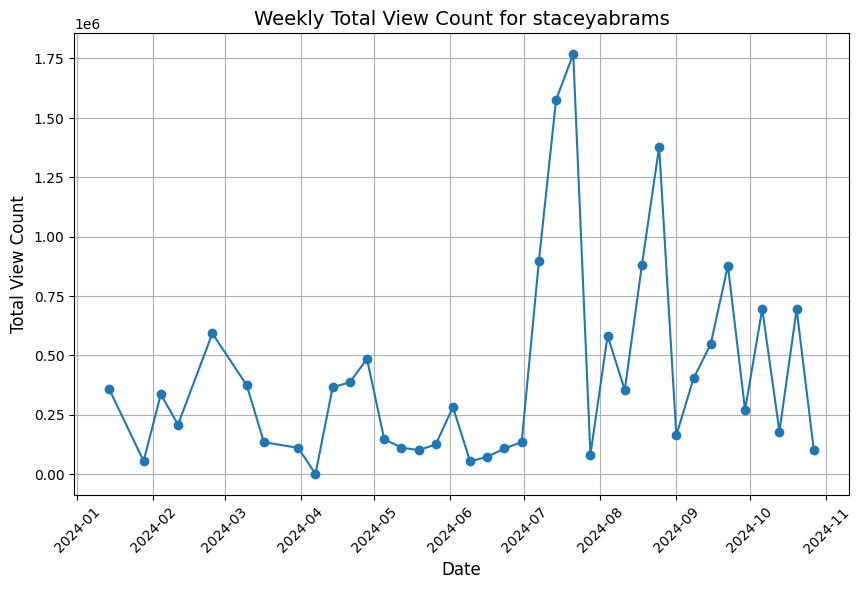

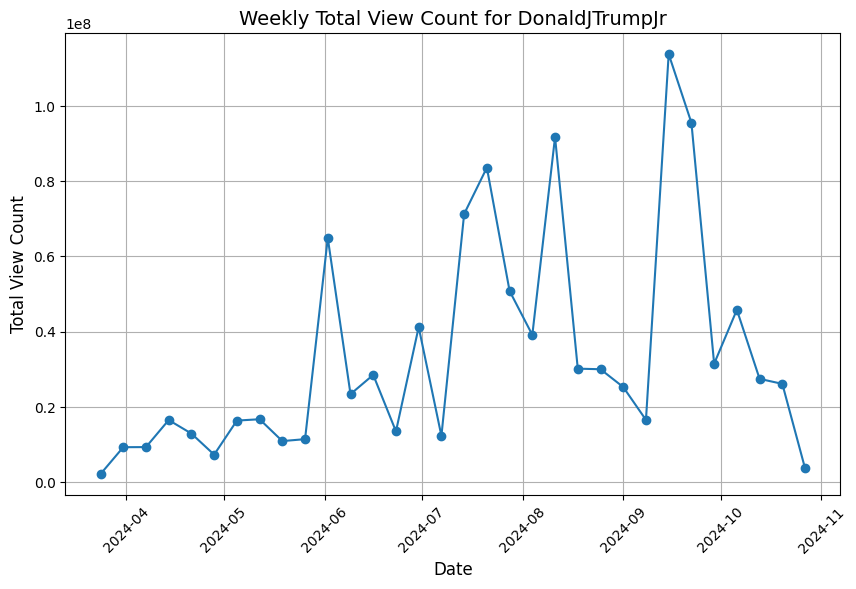

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'created_at' to datetime format
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'], utc=True)

# Ensure 'view_count' is numeric (remove rows with missing view counts if needed)
filtered_df = filtered_df.dropna(subset=['view_count'])
filtered_df['view_count'] = pd.to_numeric(filtered_df['view_count'], errors='coerce')

# Group by 'username' and 'created_at' (by week), and sum the 'view_count'
grouped = filtered_df.groupby([pd.Grouper(key='created_at', freq='W'), 'username'])['view_count'].sum().reset_index()

# Loop through each unique username and plot the total view count per week
for username in grouped['username'].unique():
    # Filter data for the current username
    user_data = grouped[grouped['username'] == username]

    # Plot the total view count per week
    plt.figure(figsize=(10, 6))
    plt.plot(user_data['created_at'], user_data['view_count'], marker='o', linestyle='-', label=username)

    # Add title and labels
    plt.title(f'Weekly Total View Count for {username}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total View Count', fontsize=12)

    # Add grid and adjust x-axis tick labels for clarity
    plt.grid(True)
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()


## Change point detection analysis

Processing metric: view_count


<ipython-input-21-f6cb6aea531d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[metric] = pd.to_numeric(df_group[metric], errors='coerce')
<ipython-input-21-f6cb6aea531d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[metric] = pd.to_numeric(df_group[metric], errors='coerce')


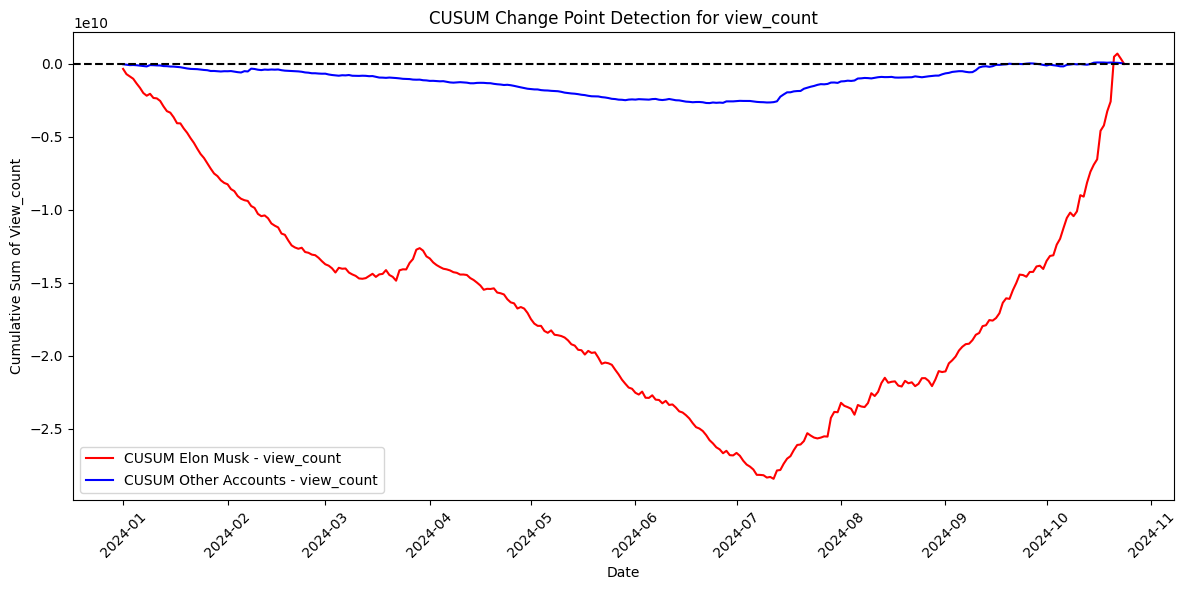

Detected Unified Change Point for view_count: 2024-07-12 00:00:00

OLS Regression Results for view_count:

                            OLS Regression Results                            
Dep. Variable:             view_count   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     2323.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:34:43   Log-Likelihood:            -9.8655e+05
No. Observations:               56184   AIC:                         1.973e+06
Df Residuals:                   56180   BIC:                         1.973e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

<ipython-input-21-f6cb6aea531d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[metric] = pd.to_numeric(df_group[metric], errors='coerce')
<ipython-input-21-f6cb6aea531d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[metric] = pd.to_numeric(df_group[metric], errors='coerce')


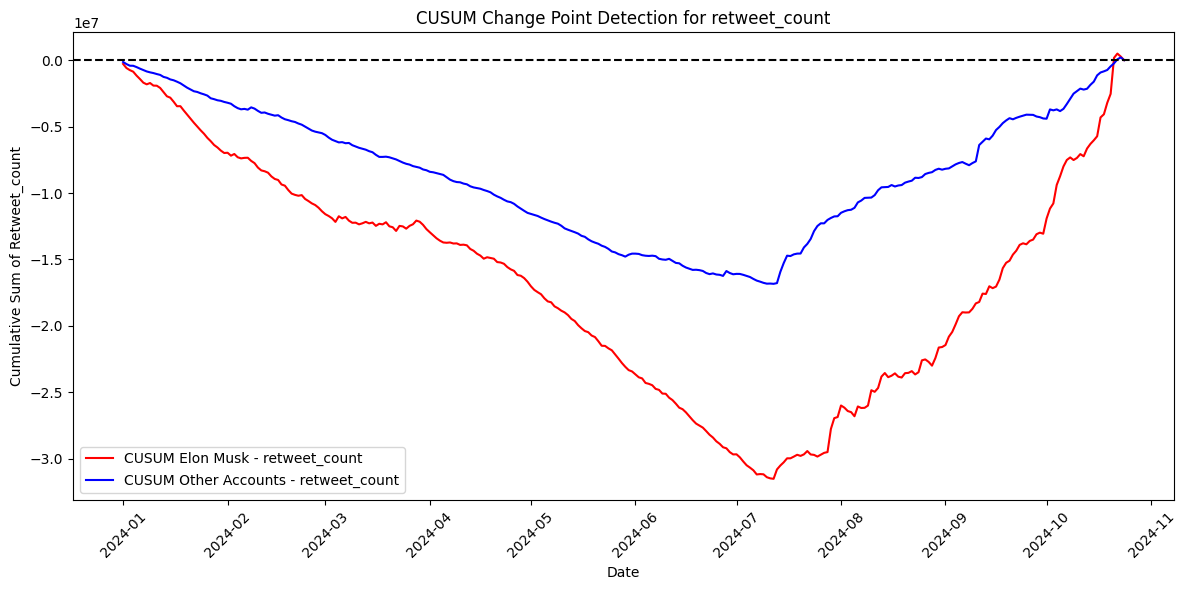

Detected Unified Change Point for retweet_count: 2024-07-12 00:00:00

OLS Regression Results for retweet_count:

                            OLS Regression Results                            
Dep. Variable:          retweet_count   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     1556.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:34:44   Log-Likelihood:            -5.9676e+05
No. Observations:               56184   AIC:                         1.194e+06
Df Residuals:                   56180   BIC:                         1.194e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

<ipython-input-21-f6cb6aea531d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[metric] = pd.to_numeric(df_group[metric], errors='coerce')
<ipython-input-21-f6cb6aea531d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group[metric] = pd.to_numeric(df_group[metric], errors='coerce')


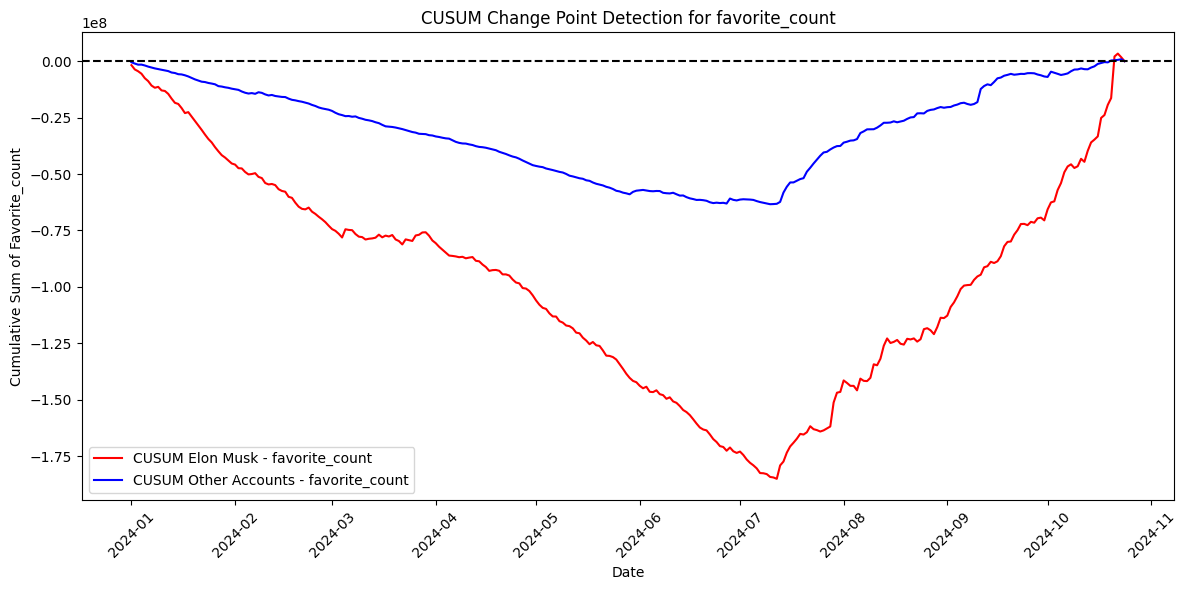

Detected Unified Change Point for favorite_count: 2024-07-12 00:00:00

OLS Regression Results for favorite_count:

                            OLS Regression Results                            
Dep. Variable:         favorite_count   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1624.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:34:45   Log-Likelihood:            -7.0255e+05
No. Observations:               56184   AIC:                         1.405e+06
Df Residuals:                   56180   BIC:                         1.405e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [21]:
# Convert 'created_at' to tz-naive datetime if it isn't already
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'], errors='coerce').dt.tz_localize(None)

# Identify Elon Musk's account and other accounts
elon_account = ['elonmusk']
other_accounts = [account for account in filtered_df['username'].str.lower().unique() if account != 'elonmusk']

# Metrics to loop through
metrics = ['view_count', 'retweet_count', 'favorite_count']

# Step 1: Filter data for Elon Musk and other accounts and clean the data
def filter_data_by_group(df, account_list, metric):
    df_group = df[df['username'].str.lower().isin(account_list)]
    # Ensure the metric column is numeric
    df_group[metric] = pd.to_numeric(df_group[metric], errors='coerce')
    # Drop rows where the metric is NaN
    df_group = df_group.dropna(subset=[metric])
    return df_group

# Step 2: Apply CUSUM after cleaning
def cusum(data):
    mean = np.mean(data)
    return np.cumsum(data - mean)

# Loop through each metric
for metric in metrics:
    print(f"Processing metric: {metric}")

    # Data filtered for Elon Musk's account and other accounts for the current metric
    elon_data = filter_data_by_group(filtered_df, elon_account, metric)
    other_data = filter_data_by_group(filtered_df, other_accounts, metric)

    # Aggregate data by day for the current metric
    elon_daily = elon_data.set_index('created_at').resample('D')[metric].sum()
    other_daily = other_data.set_index('created_at').resample('D')[metric].sum()

    # Apply CUSUM for change point detection
    elon_cumsum = cusum(elon_daily)
    other_cumsum = cusum(other_daily)

    # Plot CUSUM for Elon Musk and other accounts
    plt.figure(figsize=(12, 6))
    plt.plot(elon_daily.index, elon_cumsum, label=f'CUSUM Elon Musk - {metric}', color='red')
    plt.plot(other_daily.index, other_cumsum, label=f'CUSUM Other Accounts - {metric}', color='blue')
    plt.title(f'CUSUM Change Point Detection for {metric}')
    plt.xlabel('Date')
    plt.ylabel(f'Cumulative Sum of {metric.capitalize()}')
    plt.axhline(0, color='black', linestyle='--')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Step 3: Detect change points dynamically for each group
    change_point_index_elon = np.argmax(np.abs(elon_cumsum))
    change_point_index_other = np.argmax(np.abs(other_cumsum))

    change_point_date_elon = elon_daily.index[change_point_index_elon].tz_localize(None)
    change_point_date_other = other_daily.index[change_point_index_other].tz_localize(None)

    # Use the later change point to ensure consistency in analysis
    unified_change_point = max(change_point_date_elon, change_point_date_other).tz_localize(None)

    print(f"Detected Unified Change Point for {metric}: {unified_change_point}")

    # Prepare data for DiD Analysis
    combined_daily = filtered_df.dropna(subset=[metric, 'created_at', 'username'])
    combined_daily['created_at'] = pd.to_datetime(combined_daily['created_at']).dt.tz_localize(None)

    # Encode the groups as binary variables (1 for Elon Musk, 0 for Other Accounts)
    combined_daily['Group'] = combined_daily['username'].str.lower().isin(elon_account).astype(int)

    # Create a binary indicator for the unified change point
    combined_daily['Post'] = (combined_daily['created_at'] >= unified_change_point).astype(int)

    # Define the interaction term (Post * Group) for DiD analysis
    combined_daily['Post_Group'] = combined_daily['Post'] * combined_daily['Group']

    # Define the dependent variable (metric) and independent variables (Post, Group, Post_Group)
    y = combined_daily[metric]
    X = combined_daily[['Post', 'Group', 'Post_Group']]
    X = sm.add_constant(X)

    # Drop any remaining NaN values
    X = X.dropna()
    y = y.dropna()

    # Fit the OLS model
    DiD_model = sm.OLS(y, X).fit()

    # Print the summary of results for the current metric
    print(f"\nOLS Regression Results for {metric}:\n")
    print(DiD_model.summary())

    # Step 4: Mann-Whitney U Test
    # Elon Musk's account before and after the unified change point
    before_change_elon = elon_data[elon_data['created_at'] < unified_change_point][metric]
    after_change_elon = elon_data[elon_data['created_at'] >= unified_change_point][metric]

    # Other accounts before and after the unified change point
    before_change_other = other_data[other_data['created_at'] < unified_change_point][metric]
    after_change_other = other_data[other_data['created_at'] >= unified_change_point][metric]

    # Perform Mann-Whitney U Test for Elon Musk's account
    stat_elon, p_value_elon = mannwhitneyu(before_change_elon, after_change_elon)
    print(f"Elon Musk's Account - Mann-Whitney U Test for {metric}: Stat={stat_elon}, P-value={p_value_elon}")

    # Perform Mann-Whitney U Test for Other accounts
    stat_other, p_value_other = mannwhitneyu(before_change_other, after_change_other)
    print(f"Other Accounts - Mann-Whitney U Test for {metric}: Stat={stat_other}, P-value={p_value_other}")
    print("\n" + "="*80 + "\n")


## Visualise the detected change points in the post counts over time

Analyzing metric: view_count


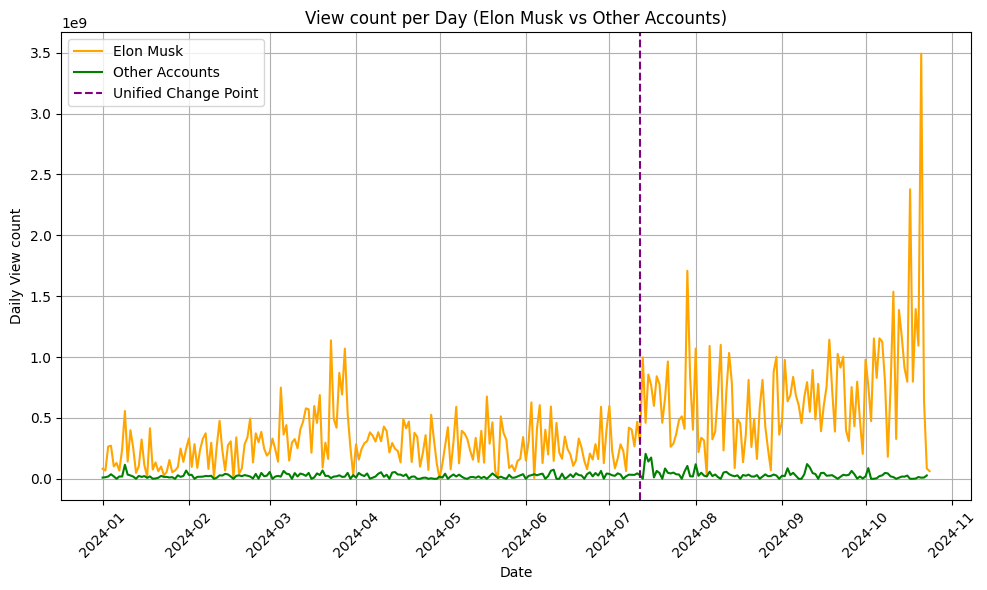

Detected Change Point for view_count (Elon Musk): 2024-07-12 00:00:00
Detected Change Point for view_count (Other Accounts): 2024-06-02 00:00:00
Unified Change Point for view_count: 2024-07-12 00:00:00

Analyzing metric: retweet_count


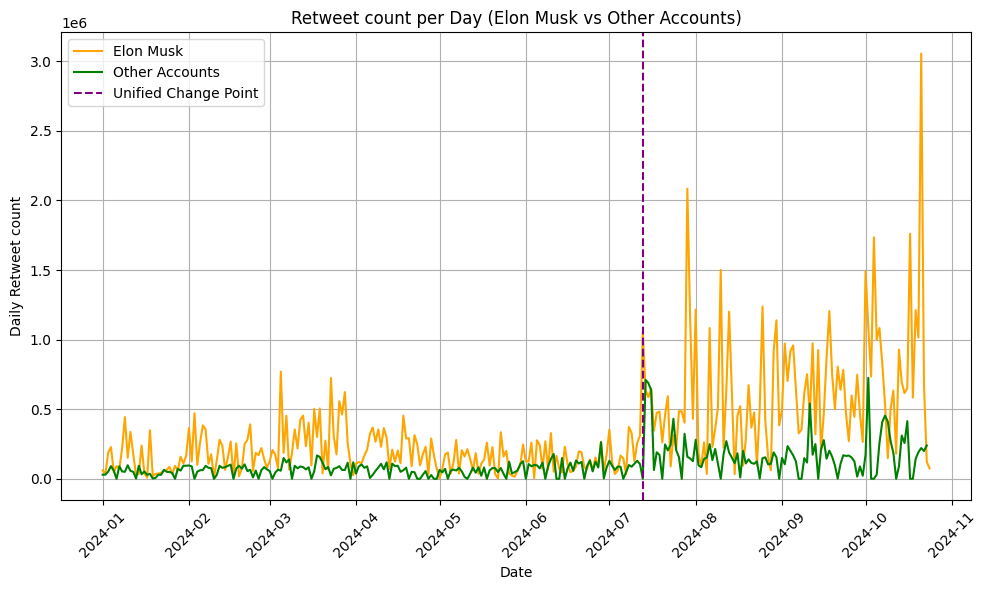

Detected Change Point for retweet_count (Elon Musk): 2024-07-12 00:00:00
Detected Change Point for retweet_count (Other Accounts): 2024-07-13 00:00:00
Unified Change Point for retweet_count: 2024-07-13 00:00:00

Analyzing metric: favorite_count


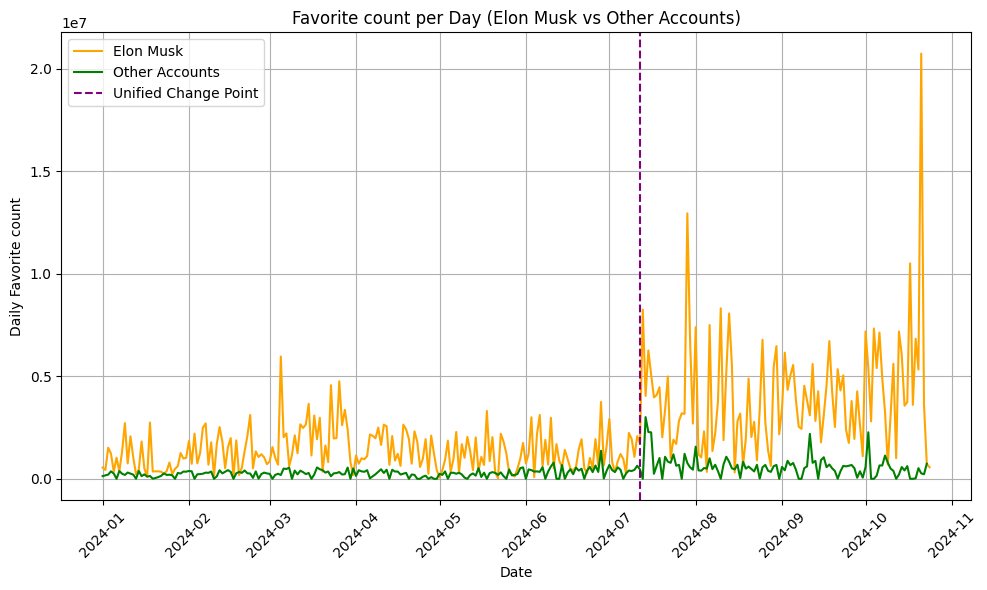

Detected Change Point for favorite_count (Elon Musk): 2024-07-12 00:00:00
Detected Change Point for favorite_count (Other Accounts): 2024-06-22 00:00:00
Unified Change Point for favorite_count: 2024-07-12 00:00:00



In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

# Convert 'created_at' to datetime if it isn't already
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'])

# Specify Elon Musk's account and all other accounts
elon_account = 'elonmusk'
other_accounts = filtered_df[~filtered_df['username'].str.lower().isin([elon_account])]['username'].unique().tolist()

# Unified function to aggregate and analyze by metric
def analyze_metric(metric_column):
    # Filter and aggregate daily data for Elon Musk and Other Accounts
    elon_daily = filtered_df[filtered_df['username'].str.lower() == elon_account].resample('D', on='created_at')[metric_column].sum().reset_index()
    others_daily = filtered_df[filtered_df['username'].str.lower().isin(other_accounts)].resample('D', on='created_at')[metric_column].sum().reset_index()

    # Calculate CUSUM to detect change point
    def cusum(data):
        mean = np.mean(data)
        return np.cumsum(data - mean)

    elon_cumsum = cusum(elon_daily[metric_column])
    others_cumsum = cusum(others_daily[metric_column])

    # Detect change points by finding the maximum deviation in CUSUM
    change_point_index_elon = np.argmax(np.abs(elon_cumsum))
    change_point_index_others = np.argmax(np.abs(others_cumsum))

    change_point_elon = elon_daily['created_at'].iloc[change_point_index_elon]
    change_point_others = others_daily['created_at'].iloc[change_point_index_others]

    # Determine the unified change point (latest of both change points)
    unified_change_point = max(change_point_elon, change_point_others)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(elon_daily['created_at'], elon_daily[metric_column], label='Elon Musk', color='orange')
    plt.plot(others_daily['created_at'], others_daily[metric_column], label='Other Accounts', color='green')

    # Mark the unified change point for both groups
    plt.axvline(unified_change_point, color='purple', linestyle='--', label='Unified Change Point')

    plt.title(f'{metric_column.replace("_", " ").capitalize()} per Day (Elon Musk vs Other Accounts)')
    plt.xlabel('Date')
    plt.ylabel(f'Daily {metric_column.replace("_", " ").capitalize()}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print detected change points for reference
    print(f"Detected Change Point for {metric_column} (Elon Musk): {change_point_elon}")
    print(f"Detected Change Point for {metric_column} (Other Accounts): {change_point_others}")
    print(f"Unified Change Point for {metric_column}: {unified_change_point}\n")

    # Return detected change points for further use
    return unified_change_point

# Loop through each metric and apply the analysis function
for metric in ['view_count', 'retweet_count', 'favorite_count']:
    print(f"Analyzing metric: {metric}")
    analyze_metric(metric)


## Calculate the percentage differences before and after change points for Musk versus other accounts

In [23]:
import pandas as pd

# Ensure all columns are lowercase to avoid casing issues
filtered_df.columns = filtered_df.columns.str.lower()

# Convert 'created_at' to timezone-naive datetime and drop rows with NaT
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'], errors='coerce').dt.tz_localize(None)
filtered_df = filtered_df.dropna(subset=['created_at'])

# Define the change point date
change_point_date = pd.Timestamp('2024-07-13')

# Filter Musk and other accounts' data
musk_data = filtered_df[filtered_df['username'].str.lower() == 'elonmusk']
other_accounts_data = filtered_df[filtered_df['username'].str.lower() != 'elonmusk']

# Separate pre and post-change point data for both groups
musk_pre_change = musk_data[musk_data['created_at'] < change_point_date]
musk_post_change = musk_data[musk_data['created_at'] >= change_point_date]
others_pre_change = other_accounts_data[other_accounts_data['created_at'] < change_point_date]
others_post_change = other_accounts_data[other_accounts_data['created_at'] >= change_point_date]

# Define the engagement metrics, verifying they exist in the DataFrame
metrics = ['view_count', 'retweet_count', 'favorite_count']
metrics = [metric for metric in metrics if metric in filtered_df.columns]

# Calculate the average for each metric pre and post-change for Musk
musk_average_pre = musk_pre_change[metrics].mean()
musk_average_post = musk_post_change[metrics].mean()

# Calculate the average for each metric pre and post-change for the other accounts
others_average_pre = others_pre_change[metrics].mean()
others_average_post = others_post_change[metrics].mean()

# Calculate the percentage increase for Musk and for other accounts
musk_percentage_increase = ((musk_average_post - musk_average_pre) / musk_average_pre) * 100
others_percentage_increase = ((others_average_post - others_average_pre) / others_average_pre) * 100

# Combine results for comparison
comparison_df = pd.DataFrame({
    'Musk Average Before Change': musk_average_pre,
    'Musk Average After Change': musk_average_post,
    'Musk Percentage Increase (%)': musk_percentage_increase,
    'Others Average Before Change': others_average_pre,
    'Others Average After Change': others_average_post,
    'Others Percentage Increase (%)': others_percentage_increase
})

# Format the DataFrame to display percentage increases with two decimal places
comparison_df['Musk Percentage Increase (%)'] = comparison_df['Musk Percentage Increase (%)'].round(2)
comparison_df['Others Percentage Increase (%)'] = comparison_df['Others Percentage Increase (%)'].round(2)

print("Comparison of Percentage Increase in Engagement Metrics for Musk vs. Other Accounts After Structural Break on July 13, 2024:")
comparison_df


Comparison of Percentage Increase in Engagement Metrics for Musk vs. Other Accounts After Structural Break on July 13, 2024:


,Musk Average Before Change,Musk Average After Change,Musk Percentage Increase (%),Others Average Before Change,Others Average After Change,Others Percentage Increase (%)
view_count,4.822738e+06,1.149133e+07,138.27,392439.108702,615872.542894,56.93
retweet_count,3.149258e+03,1.064248e+04,237.94,1065.988364,2687.933737,152.15
favorite_count,2.359085e+04,6.735261e+04,185.50,4634.439998,10641.380910,129.62


# Phase Two: Are pro-Republican accounts on X receiving a boost to engagement?

## Change point detection analysis

Processing metric: view_count


<ipython-input-24-f29187d0107f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_party[metric] = pd.to_numeric(df_party[metric], errors='coerce')
<ipython-input-24-f29187d0107f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_party[metric] = pd.to_numeric(df_party[metric], errors='coerce')


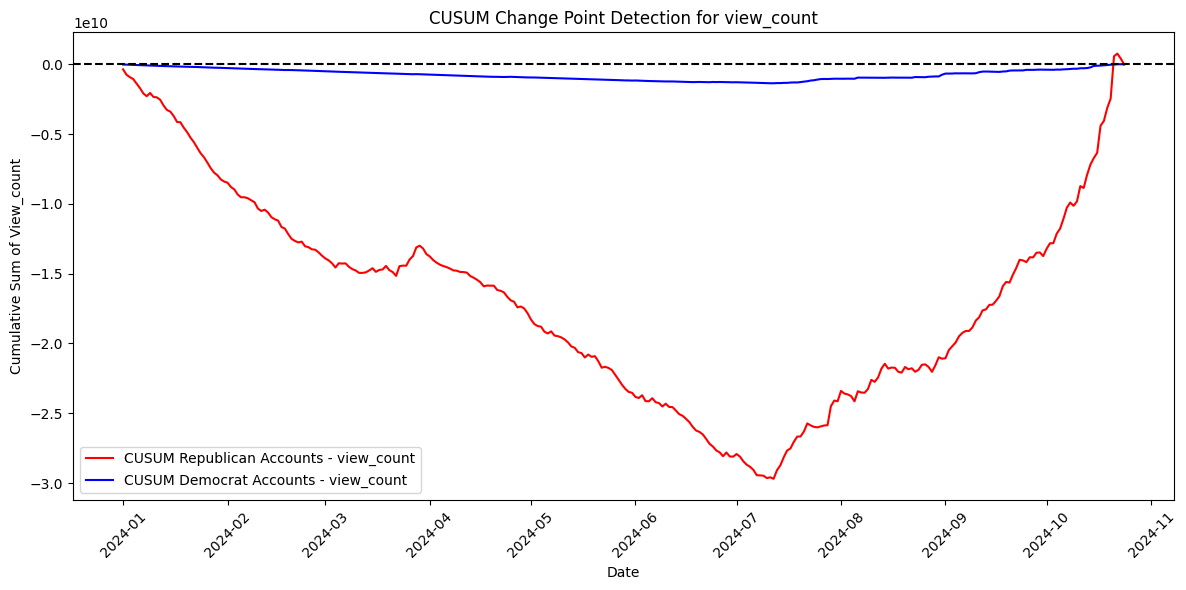

Detected Unified Change Point for view_count: 2024-07-12 00:00:00

OLS Regression Results for view_count:

                            OLS Regression Results                            
Dep. Variable:             view_count   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     186.2
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          3.76e-120
Time:                        00:34:49   Log-Likelihood:            -9.8956e+05
No. Observations:               56184   AIC:                         1.979e+06
Df Residuals:                   56180   BIC:                         1.979e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

<ipython-input-24-f29187d0107f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_party[metric] = pd.to_numeric(df_party[metric], errors='coerce')
<ipython-input-24-f29187d0107f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_party[metric] = pd.to_numeric(df_party[metric], errors='coerce')


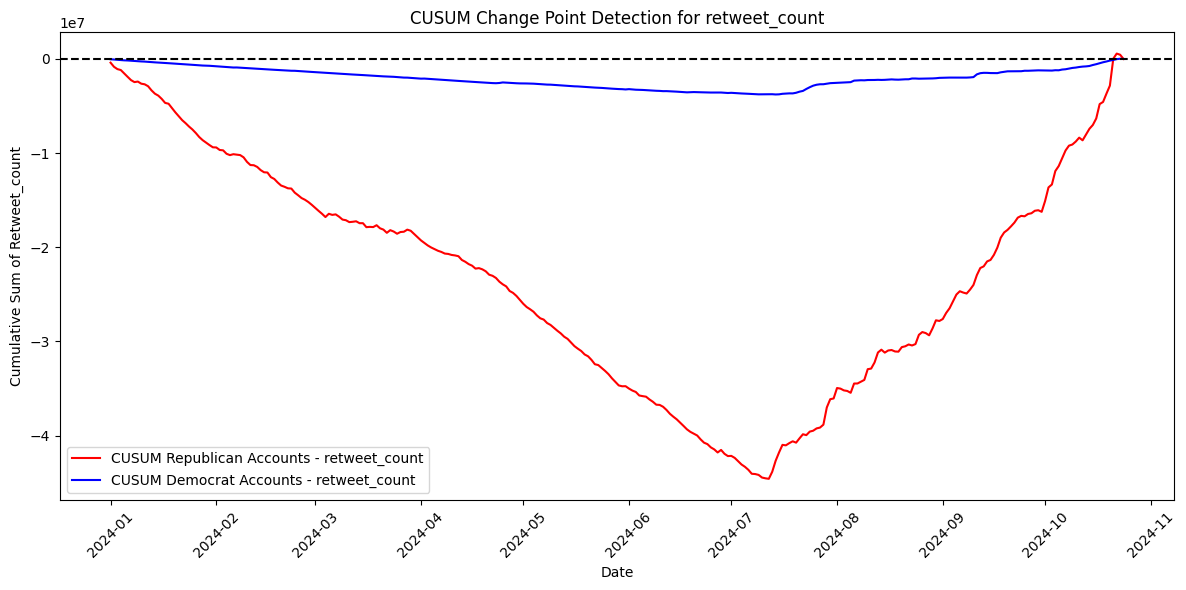

Detected Unified Change Point for retweet_count: 2024-07-14 00:00:00

OLS Regression Results for retweet_count:

                            OLS Regression Results                            
Dep. Variable:          retweet_count   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     457.9
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          5.40e-294
Time:                        00:34:51   Log-Likelihood:            -5.9832e+05
No. Observations:               56184   AIC:                         1.197e+06
Df Residuals:                   56180   BIC:                         1.197e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

<ipython-input-24-f29187d0107f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_party[metric] = pd.to_numeric(df_party[metric], errors='coerce')
<ipython-input-24-f29187d0107f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_party[metric] = pd.to_numeric(df_party[metric], errors='coerce')


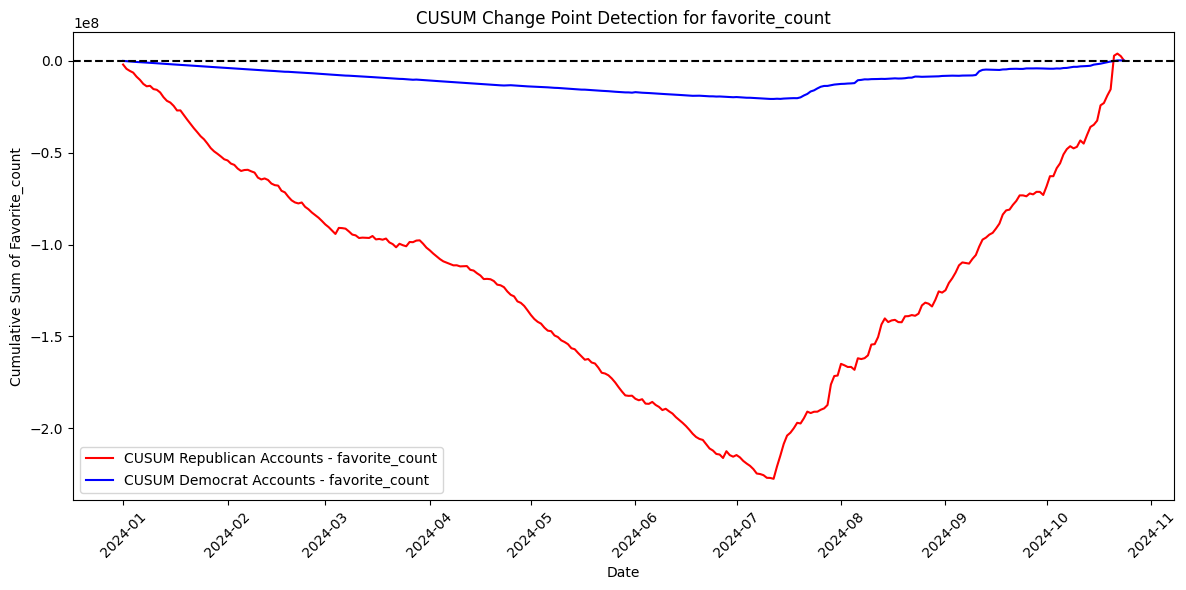

Detected Unified Change Point for favorite_count: 2024-07-12 00:00:00

OLS Regression Results for favorite_count:

                            OLS Regression Results                            
Dep. Variable:         favorite_count   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     276.6
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          2.95e-178
Time:                        00:34:52   Log-Likelihood:            -7.0448e+05
No. Observations:               56184   AIC:                         1.409e+06
Df Residuals:                   56180   BIC:                         1.409e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

# Convert 'created_at' to datetime if it isn't already
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'])

# List of Republican and Democrat accounts
republican_accounts = ['elonmusk', 'benshapiro', 'tuckercarlson', 'libsoftiktok', 'jackposobiec', 'donaldjtrumpjr']
democrat_accounts = ['aoc', 'berniesanders', 'kamalaharris', 'corybooker', 'staceyabrams']

# Metrics to loop through
metrics = ['view_count', 'retweet_count', 'favorite_count']

# Step 1: Filter data for Republicans and Democrats and clean the data
def filter_data_by_party(df, party_accounts, metric):
    df_party = df[df['username'].str.lower().isin(party_accounts)]
    # Ensure the metric column is numeric
    df_party[metric] = pd.to_numeric(df_party[metric], errors='coerce')
    # Drop rows where the metric is NaN
    df_party = df_party.dropna(subset=[metric])
    return df_party

# Step 2: Apply CUSUM after cleaning
def cusum(data):
    mean = np.mean(data)
    return np.cumsum(data - mean)

# Loop through each metric
for metric in metrics:
    print(f"Processing metric: {metric}")

    # Republican and Democrat data filtered for the current metric
    republican_data = filter_data_by_party(filtered_df, republican_accounts, metric)
    democrat_data = filter_data_by_party(filtered_df, democrat_accounts, metric)

    # Aggregate data by day for the current metric
    republican_daily = republican_data.set_index('created_at').resample('D')[metric].sum()
    democrat_daily = democrat_data.set_index('created_at').resample('D')[metric].sum()

    # Apply CUSUM for change point detection
    republican_cumsum = cusum(republican_daily)
    democrat_cumsum = cusum(democrat_daily)

    # Plot CUSUM for Republicans and Democrats
    plt.figure(figsize=(12, 6))
    plt.plot(republican_daily.index, republican_cumsum, label=f'CUSUM Republican Accounts - {metric}', color='red')
    plt.plot(democrat_daily.index, democrat_cumsum, label=f'CUSUM Democrat Accounts - {metric}', color='blue')
    plt.title(f'CUSUM Change Point Detection for {metric}')
    plt.xlabel('Date')
    plt.ylabel(f'Cumulative Sum of {metric.capitalize()}')
    plt.axhline(0, color='black', linestyle='--')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Step 3: Detect change points dynamically for each group
    change_point_index_republican = np.argmax(np.abs(republican_cumsum))
    change_point_index_democrat = np.argmax(np.abs(democrat_cumsum))

    change_point_date_republican = republican_daily.index[change_point_index_republican]
    change_point_date_democrat = democrat_daily.index[change_point_index_democrat]

    # Use the later change point to ensure consistency in analysis
    unified_change_point = max(change_point_date_republican, change_point_date_democrat)

    print(f"Detected Unified Change Point for {metric}: {unified_change_point}")

    # Prepare data for DiD Analysis
    combined_daily = filtered_df.dropna(subset=[metric, 'created_at', 'username'])
    combined_daily['created_at'] = pd.to_datetime(combined_daily['created_at']).dt.tz_localize(None)

    # Encode the groups as binary variables (1 for Republican, 0 for Democrat)
    combined_daily['Group'] = combined_daily['username'].str.lower().isin(republican_accounts).astype(int)

    # Create a binary indicator for the unified change point
    combined_daily['Post'] = (combined_daily['created_at'] >= unified_change_point).astype(int)

    # Define the interaction term (Post * Group) for DiD analysis
    combined_daily['Post_Group'] = combined_daily['Post'] * combined_daily['Group']

    # Define the dependent variable (metric) and independent variables (Post, Group, Post_Group)
    y = combined_daily[metric]
    X = combined_daily[['Post', 'Group', 'Post_Group']]
    X = sm.add_constant(X)

    # Drop any remaining NaN values
    X = X.dropna()
    y = y.dropna()

    # Fit the OLS model
    DiD_model = sm.OLS(y, X).fit()

    # Print the summary of results for the current metric
    print(f"\nOLS Regression Results for {metric}:\n")
    print(DiD_model.summary())

    # Step 4: Mann-Whitney U Test
    # Republican accounts before and after the unified change point
    before_change_republican = republican_data[republican_data['created_at'] < unified_change_point][metric]
    after_change_republican = republican_data[republican_data['created_at'] >= unified_change_point][metric]

    # Democrat accounts before and after the unified change point
    before_change_democrat = democrat_data[democrat_data['created_at'] < unified_change_point][metric]
    after_change_democrat = democrat_data[democrat_data['created_at'] >= unified_change_point][metric]

    # Perform Mann-Whitney U Test for Republican accounts
    stat_republican, p_value_republican = mannwhitneyu(before_change_republican, after_change_republican)
    print(f"Republican Accounts - Mann-Whitney U Test for {metric}: Stat={stat_republican}, P-value={p_value_republican}")

    # Perform Mann-Whitney U Test for Democrat accounts
    stat_democrat, p_value_democrat = mannwhitneyu(before_change_democrat, after_change_democrat)
    print(f"Democrat Accounts - Mann-Whitney U Test for {metric}: Stat={stat_democrat}, P-value={p_value_democrat}")
    print("\n" + "="*80 + "\n")


## Visualise the detected change points in the post counts over time



Analyzing metric: view_count


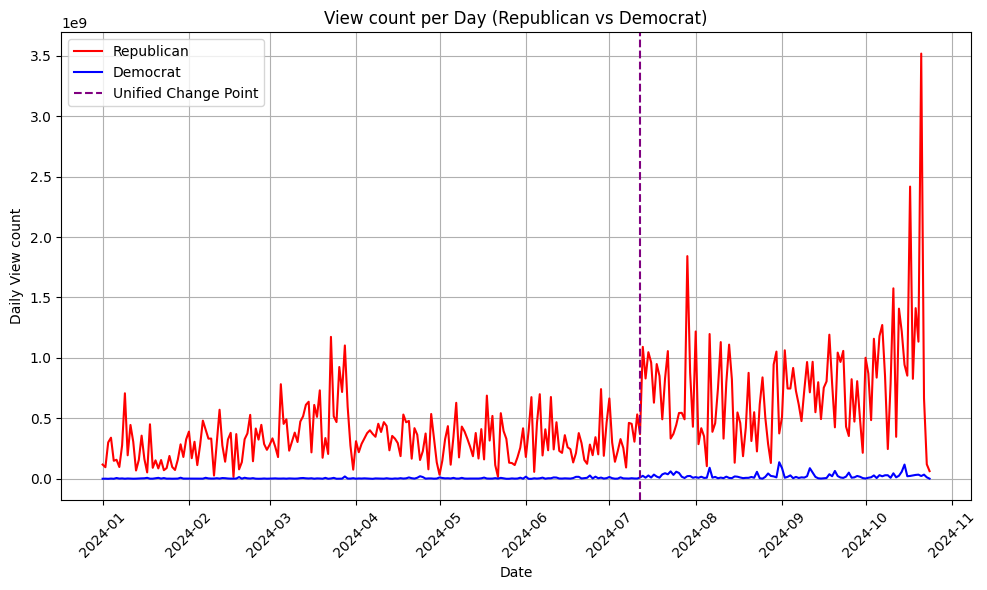

Detected Change Point for view_count (Republican): 2024-07-12 00:00:00
Detected Change Point for view_count (Democrat): 2024-07-12 00:00:00
Unified Change Point for view_count: 2024-07-12 00:00:00

Analyzing metric: retweet_count


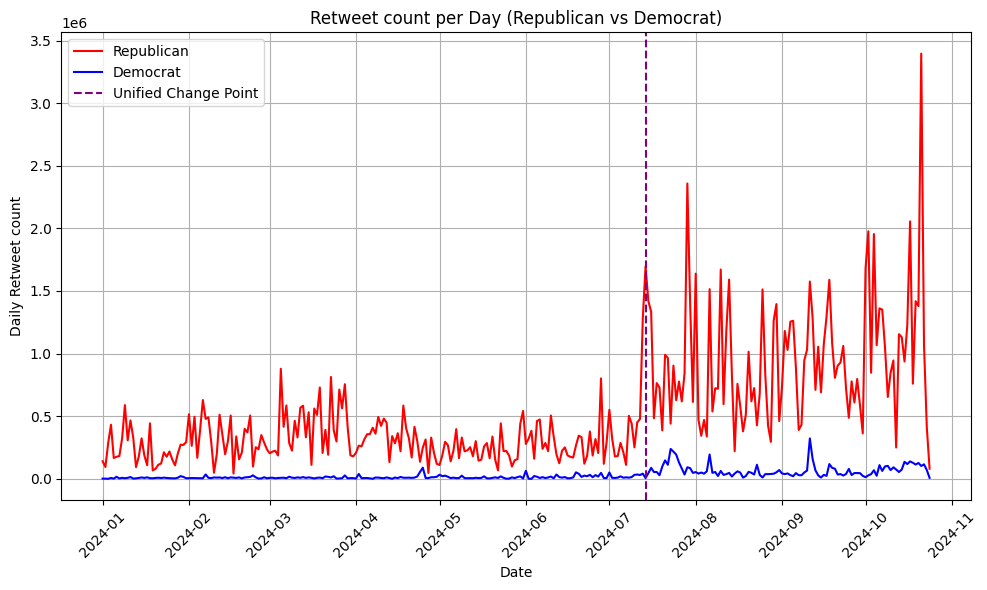

Detected Change Point for retweet_count (Republican): 2024-07-12 00:00:00
Detected Change Point for retweet_count (Democrat): 2024-07-14 00:00:00
Unified Change Point for retweet_count: 2024-07-14 00:00:00

Analyzing metric: favorite_count


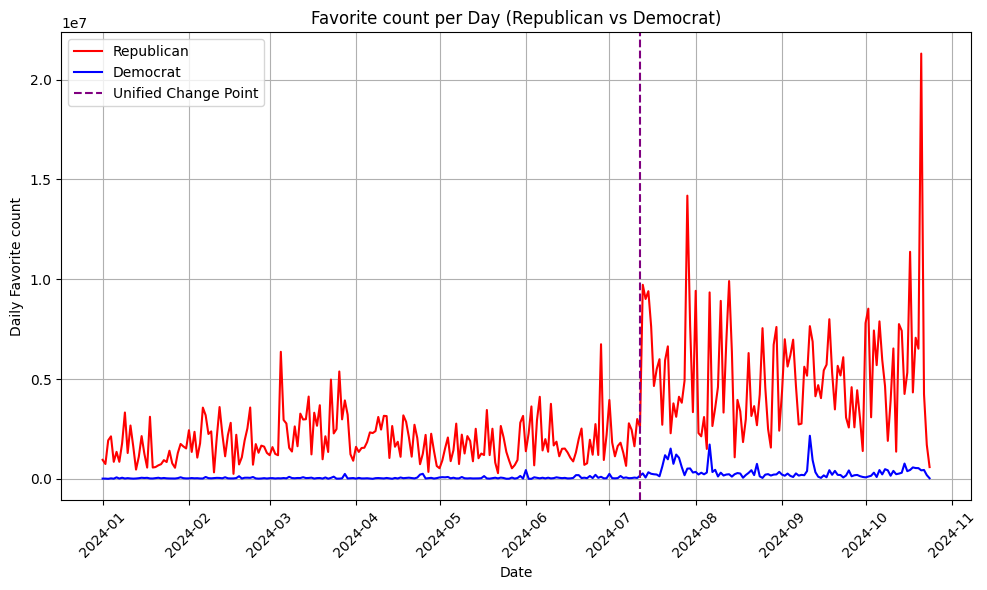

Detected Change Point for favorite_count (Republican): 2024-07-12 00:00:00
Detected Change Point for favorite_count (Democrat): 2024-07-12 00:00:00
Unified Change Point for favorite_count: 2024-07-12 00:00:00



In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

# Convert 'created_at' to datetime if it isn't already
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'])

# List of Republican and Democrat accounts
republican_accounts = ['elonmusk', 'benshapiro', 'tuckercarlson', 'libsoftiktok', 'jackposobiec', 'donaldjtrumpjr']
democrat_accounts = ['aoc', 'berniesanders', 'kamalaharris', 'corybooker', 'staceyabrams']

# Unified function to aggregate and analyze by metric
def analyze_metric(metric_column):
    # Filter and aggregate daily data for Republicans and Democrats
    republican_daily = filtered_df[filtered_df['username'].str.lower().isin(republican_accounts)].resample('D', on='created_at')[metric_column].sum().reset_index()
    democrat_daily = filtered_df[filtered_df['username'].str.lower().isin(democrat_accounts)].resample('D', on='created_at')[metric_column].sum().reset_index()

    # Calculate CUSUM to detect change point
    def cusum(data):
        mean = np.mean(data)
        return np.cumsum(data - mean)

    republican_cumsum = cusum(republican_daily[metric_column])
    democrat_cumsum = cusum(democrat_daily[metric_column])

    # Detect change points by finding the maximum deviation in CUSUM
    change_point_index_republican = np.argmax(np.abs(republican_cumsum))
    change_point_index_democrat = np.argmax(np.abs(democrat_cumsum))

    change_point_republican = republican_daily['created_at'].iloc[change_point_index_republican]
    change_point_democrat = democrat_daily['created_at'].iloc[change_point_index_democrat]

    # Determine the unified change point (latest of both change points)
    unified_change_point = max(change_point_republican, change_point_democrat)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(republican_daily['created_at'], republican_daily[metric_column], label='Republican', color='red')
    plt.plot(democrat_daily['created_at'], democrat_daily[metric_column], label='Democrat', color='blue')

    # Mark the unified change point for both groups
    plt.axvline(unified_change_point, color='purple', linestyle='--', label='Unified Change Point')

    plt.title(f'{metric_column.replace("_", " ").capitalize()} per Day (Republican vs Democrat)')
    plt.xlabel('Date')
    plt.ylabel(f'Daily {metric_column.replace("_", " ").capitalize()}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print detected change points for reference
    print(f"Detected Change Point for {metric_column} (Republican): {change_point_republican}")
    print(f"Detected Change Point for {metric_column} (Democrat): {change_point_democrat}")
    print(f"Unified Change Point for {metric_column}: {unified_change_point}\n")

    # Return detected change points for further use
    return unified_change_point

# Loop through each metric and apply the analysis function
for metric in ['view_count', 'retweet_count', 'favorite_count']:
    print(f"Analyzing metric: {metric}")
    analyze_metric(metric)
